# From percepton to neural networks
### What if our data is not linearly separable? Then they cannot be separated from a single neuron. We will build a neural network by connecting the outputs of neurons to the inputs of others.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
import numpy as np

tf.random.set_seed(13)

* We list the neurons in *layers* (layers) or levels.

* The first layer is called the *input layer*.

* The last layer is called the *output layer*.

* The intermediate layers are called *hidden layers*.

* So we will create a data set that is not linearly separable.

* Data will fit into concentric circles.

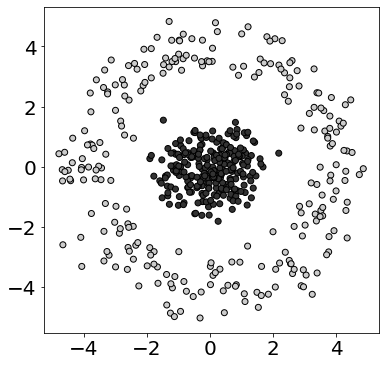

In [2]:
from sklearn.datasets import make_circles
cm_data = ListedColormap(['0.8', '0.2'])

mul_factor = 4
data, labels = make_circles(500,
                            shuffle=True,
                            noise=0.13,
                            factor=0.2,
                            random_state=13)
data = data * mul_factor

x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data,
           edgecolors='k')

plt.xticks(range(-4, 5, 2))
plt.tick_params(labelsize=20)

* Our neural network will consist of:

 1. An input layer, with two neurons.

 2. A hidden layer, with four neurons, connected to the input layer.

 3. A second hidden layer, with two neurons, connected to the first hidden layer.

 4. An output layer, with one neuron.

In [3]:
model = keras.Sequential([
    # input_shape gives the dimensions of the input layer
    keras.layers.Dense(4, input_shape=(2,), activation=tf.nn.tanh), 
    keras.layers.Dense(2, activation=tf.nn.tanh),
    keras.layers.Dense(1, activation=tf.nn.tanh)
])

2022-03-01 15:01:35.704928: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* With the `summary()` method we can get a summary of the model (without the input layer).

* `summary()' also gives us the dimensions of each layer.

* The dimensions here are how many values ​​each layer gives to the output.

* Values ​​are the number of neurons, for each bin.

* The value `None' corresponds to the size of each bun, which will be known at the time of training.

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


* The first hidden layer has four neurons. Each of them has two weights and one bias, so we have $4 \times (2+1) = 12$ parameters.

* The second hidden layer has two neurons. Each of them has four weights and one bias, so we have $2 \times (4 + 1) = 10$ parameters.

* The output layer has one neuron with two weights and one bias, so $2 + 1 = 3$ parameters.

* The input layer just gives the values ​​in the first hidden layer, so it has no parameters.

* We can also get a graphical representation of the model if we have installed the `pydot` or `pydot-ng` or `pydotplus` package.

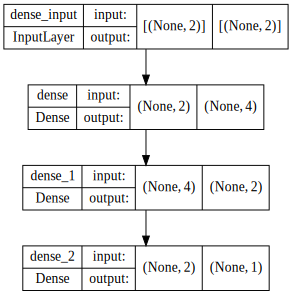

In [5]:
from IPython.display import SVG, display
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

* This time we used another activation function, tanh.

* This is the *hyperbolic tangent*.

* Pronounced 'tan-H' or 'then' or 'thents' with a soft 'th', like 'thanks'.

* Similar to the sigmoid function, but differs from it in that the output ranges from -1 to +1.

* So if the weighted input is negative, we get a negative output, as an inhibit signal.

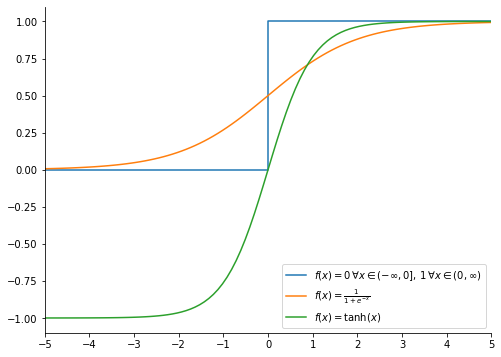

In [6]:
fig = plt.figure(figsize=(8, 6))

ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((-5, 5))
plt.xticks(np.arange(-5, 6, 1))
x = np.linspace(-5, 0, 50)
y = np.zeros_like(x)
all_x = np.append(x, -x[::-1])
all_y = np.append(y, np.ones_like(-x[::-1]))
plt.plot(all_x, all_y, label= r"$f(x) = 0\, \forall x \in (-\infty, 0],\, 1\, \forall x \in (0, \infty)$")
all_s_y = 1 / (1 + np.exp(-all_x))
all_t_y = np.tanh(all_x)
plt.plot(all_x, all_s_y, label=r"$f(x) = \frac{1}{1 + e^{-x}}$")
plt.plot(all_x, all_t_y, label=r"$f(x) = \tanh(x)$")
_ = plt.legend(loc='lower right')

* How does this network learn?

* Through the *backpropagation* algorithm.

* For each bin, neurons fire from left to right.

* When we reach the exit, we calculate the loss.

* Based on this, we calculate how much we need to correct the weights and bias of the output layer.

* After we fix the output layer, we can fix the weights and bias in the second hidden layer.

* After fixing the second hidden layer, we can fix the weights and bias in the first hidden layer.

* So we proceed to the first hidden layer, where we have nothing to fix.

* We repeat this process back and forth with our next data, and so on.

* To do all this, we create the optimizer.

In [7]:
sgd = optimizers.SGD(learning_rate=0.1)

* We set the optimizer, loss, and performance metric with the `compile()` method.

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

* We call the `fit()` method.

* We will use 150 epochs and bins of 10 samples, so each epoch will have $500/10 = $50 bins.

In [9]:
model.fit(data, labels, batch_size=10, epochs=150)

Epoch 1/150
50/50 [==============================] - 0s 678us/step - loss: 0.2139 - accuracy: 0.7000
Epoch 2/150
50/50 [==============================] - 0s 668us/step - loss: 0.1360 - accuracy: 0.8600
Epoch 3/150
50/50 [==============================] - 0s 628us/step - loss: 0.1085 - accuracy: 0.8800
Epoch 4/150
50/50 [==============================] - 0s 646us/step - loss: 0.1011 - accuracy: 0.8760
Epoch 5/150
50/50 [==============================] - 0s 625us/step - loss: 0.0988 - accuracy: 0.8800
Epoch 6/150
50/50 [==============================] - 0s 624us/step - loss: 0.0980 - accuracy: 0.8820
Epoch 7/150
50/50 [==============================] - 0s 685us/step - loss: 0.0990 - accuracy: 0.8740
Epoch 8/150
50/50 [==============================] - 0s 614us/step - loss: 0.0933 - accuracy: 0.8840
Epoch 9/150
50/50 [==============================] - 0s 676us/step - loss: 0.0955 - accuracy: 0.8880
Epoch 10/150
50/50 [==============================] - 0s 620us/step - loss: 0.0913 - accura

* Let's see what we accomplished.

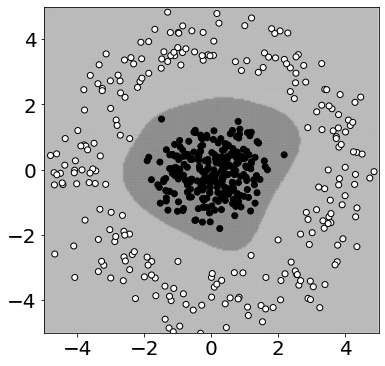

In [10]:
offset = 0.01

x_min, x_max = -5, 5 
y_min, y_max = -5, 5 

h = .05  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h),
                     np.arange(y_min, y_max+h, h))

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])

z = predictions.reshape(xx.shape)

cm_mesh = ListedColormap(['0.7', '0.5'])

cm_data_mesh = ListedColormap(['1', '0'])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.pcolormesh(xx, yy, z,
              cmap=cm_mesh,
              shading='gouraud',
              alpha=0.4)


ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data_mesh,
           linewidth=1,
           edgecolors='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-4, 5, 2))
plt.tick_params(labelsize=20)

* We therefore succeeded in classifying non-linearly separable data.

* Indeed, by going from the single neuron to networks of neurons, we can calculate, eventually, anything that could be calculated with a computer.

* In other words: a neural network can calculate anything that we can calculate on a computer by other methods.

* The power of neural networks lies in accumulating layers and connections so that they can solve increasingly complex problems.